<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/eda/%5BTabular%5D_missing_%26_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

inspiration for [unsupervised clustering](https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080): 

#Library and Installation

In [4]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
#Access to kaggle and download the data
!gdown --id 19xQX20kpYtwlWbz9WEATDJ2DyDihWbLx #Download Kaggle JSON File

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c tabular-playground-series-jul-2022 #download data from the Kaggle competition

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19xQX20kpYtwlWbz9WEATDJ2DyDihWbLx
To: /content/kaggle.json
100% 76.0/76.0 [00:00<00:00, 137kB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
tabular-playground-series-jul-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#Unzip the data files
!unzip '/content/tabular-playground-series-jul-2022.zip'

Archive:  /content/tabular-playground-series-jul-2022.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   


#EDA

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/data.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [9]:
data.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [10]:
sample_submission.head(5)

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


inspiration for finding missing values: [Click](https://www.google.com/url?q=https://towardsdatascience.com/advanced-missing-data-imputation-methods-with-sklearn-d9875cbcc6eb&sa=D&source=editors&ust=1658122669195868&usg=AOvVaw3tixP-nsSSzzdRN3DPsfbx)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.41 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


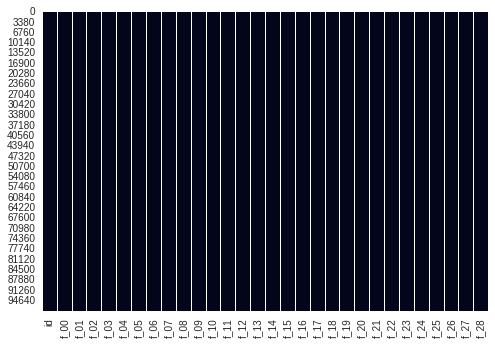

In [12]:
#Plot to see the missing values

#change version of the matplotlib first to be able to enable heatmap as follows:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

# check for missing values in the
sns.heatmap(data.isnull(), cbar=False)

In [13]:
#Find mean of is-nulled data
data.isnull().mean().sort_values(ascending=False)

id      0.0
f_00    0.0
f_27    0.0
f_26    0.0
f_25    0.0
f_24    0.0
f_23    0.0
f_22    0.0
f_21    0.0
f_20    0.0
f_19    0.0
f_18    0.0
f_17    0.0
f_16    0.0
f_15    0.0
f_14    0.0
f_13    0.0
f_12    0.0
f_11    0.0
f_10    0.0
f_09    0.0
f_08    0.0
f_07    0.0
f_06    0.0
f_05    0.0
f_04    0.0
f_03    0.0
f_02    0.0
f_01    0.0
f_28    0.0
dtype: float64

In [14]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


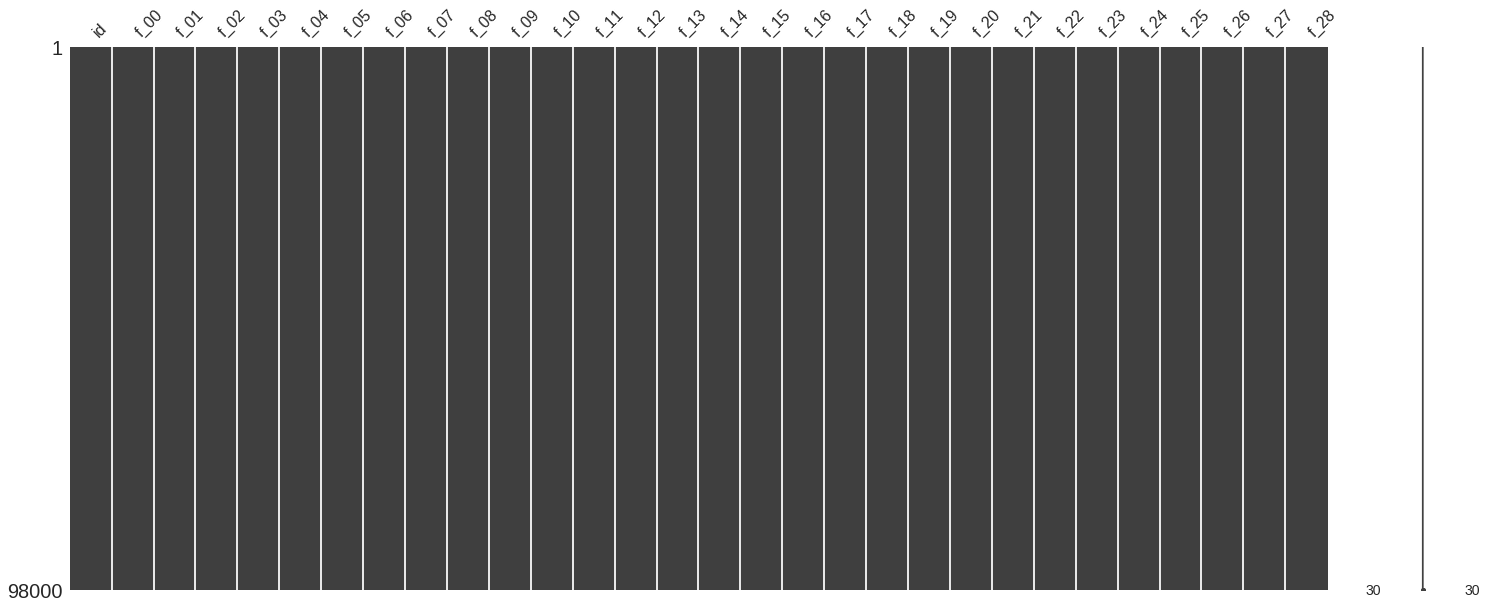

In [15]:
#the more white spaces, the more missing data.
import missingno as msno
msno.matrix(data)

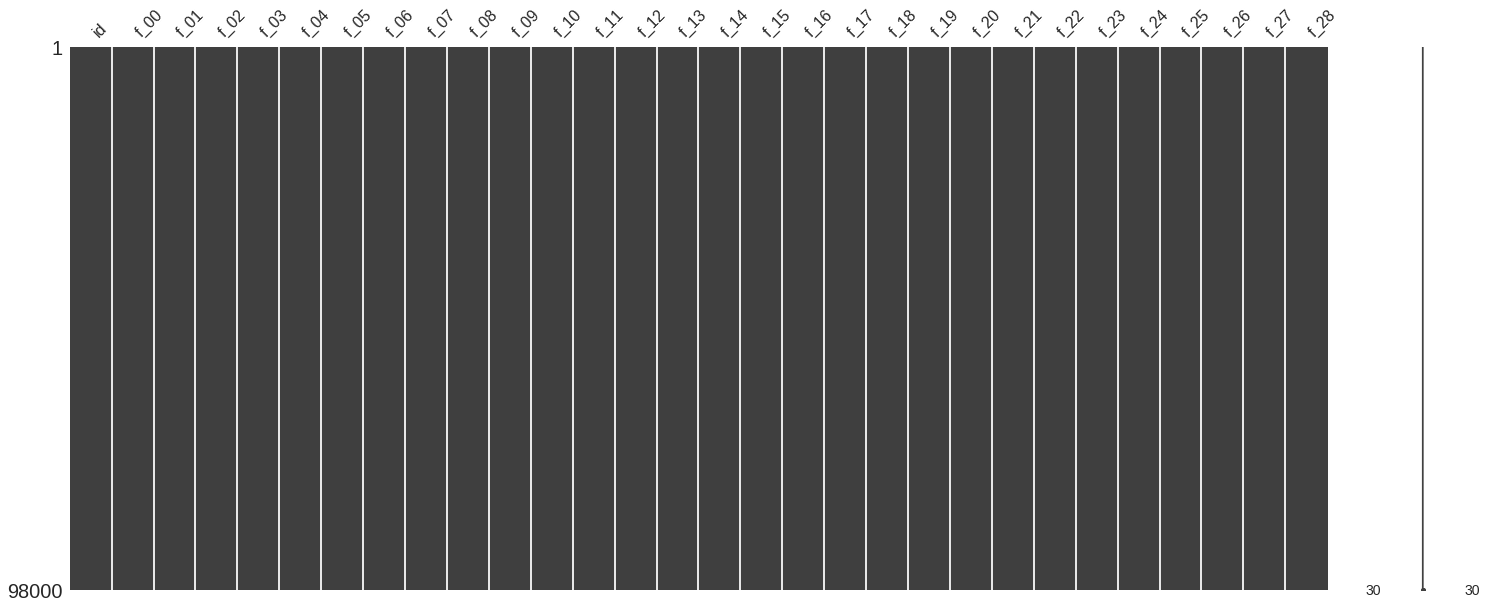

In [16]:
#See correlation of others with f_05
msno.matrix(data.sort_values("f_05"))

# PyCareting

In [17]:
#[Restart Runtime Needed] Addressed for "Missing optional dependency 'Jinja2'" from the link as follows:
#https://stackoverflow.com/questions/72090241/unable-to-resolve-import-error-from-pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
autoviz 0.1.41 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


In [18]:
import jinja2
from pycaret.regression import *

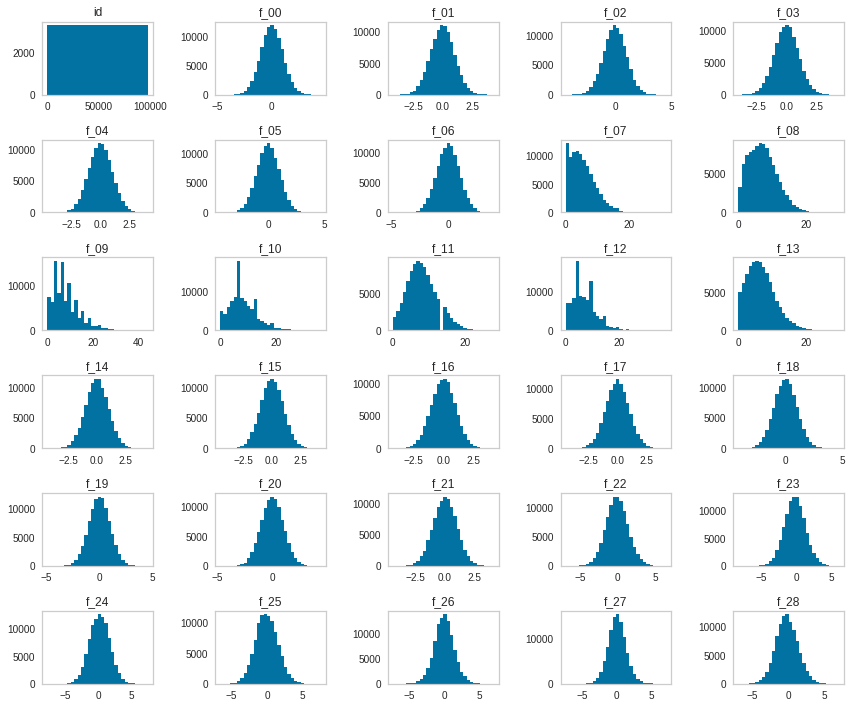

In [34]:
#visualize the distribution of each variable. 
data.hist(bins = 30, figsize = (12,10), grid = False)
plt.tight_layout()
plt.show()

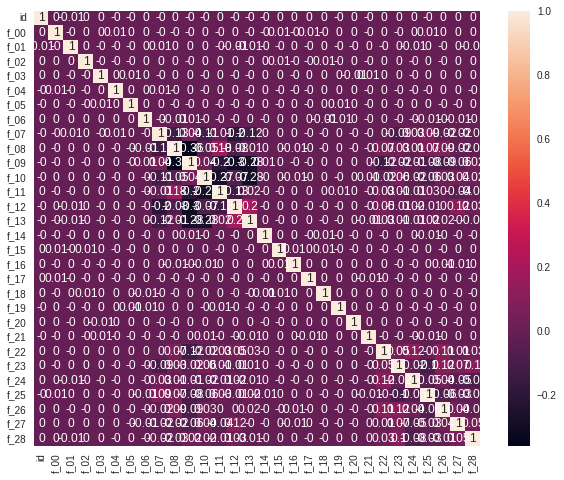

In [35]:
#See correlation of values in between columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()